In [22]:
import pandas as pd
import sys


sys.path.append('../../')
from src.plot_helpers import plot_experiment_range,plot_correlation_matrix
from src.transform import transform_diff_avg,load_json

ls = load_json("../../json/locations.json")["ls"]

## Load data

In [23]:
df = pd.read_csv('../../data/clean_data/all_sensors.csv',index_col=0,parse_dates=True)
df

/tmp/ipykernel_1933320/2544046345.py:1: DtypeWarning:

Columns (6,26) have mixed types. Specify dtype option on import or set low_memory=False.



aqi_palas  averaging      cn  co      co2  dcn  \
datetime                                                              
2024-10-11 13:24:18        NaN        NaN     NaN NaN   566.00  NaN   
2024-10-11 13:33:57        NaN        NaN     NaN NaN   528.00  NaN   
2024-10-11 13:43:57        NaN        NaN     NaN NaN   596.00  NaN   
2024-10-11 13:44:34        NaN        NaN     NaN NaN   675.00  NaN   
2024-10-11 13:54:27        NaN        NaN     NaN NaN   701.00  NaN   
...                        ...        ...     ...  ..      ...  ...   
2024-10-23 13:31:00      82.00       60.0  910.15 NaN  1047.80   ->   
2024-10-23 13:32:00      82.00       60.0  930.16 NaN  1041.80   ->   
2024-10-23 13:33:00      82.77       60.0  942.98 NaN  1049.43   ->   
2024-10-23 13:34:00      83.00       60.0  930.83 NaN  1116.17   ->   
2024-10-23 13:35:00      83.00       60.0  892.17 NaN  1213.57   ->   

                     formaldehyde  global_error  humidity  indoor_nox_index  \
datetime                                                                      
2024-10-11 13:24:18           3.0           NaN     58.00               NaN   
2024-10-11 13:33:57          11.0           NaN     58.00               NaN   
2024-10-11 13:43:57          36.0           NaN     57.00               NaN   
2024-10-11 13:44:34          42.0           NaN     57.00               NaN   
2024-10-11 13:54:27          41.0           NaN     57.00               NaN   
...                           ...           ...       ...               ...   
2024-10-23 13:31:00           NaN           0.0     58.04               NaN   
2024-10-23 13:32:00           NaN           0.0     58.21               NaN   
2024-10-23 13:33:00           NaN           0.0     58.21               NaN   
2024-10-23 13:34:00           NaN           0.0     58.75               NaN   
2024-10-23 13:35:00           NaN           0.0     58.52               NaN   

                     ...  temperature   tvoc  tvoc_ppb   voc  volume_flow  \
datetime             ...                                                    
2024-10-11 13:24:18  ...        20.50    0.0       NaN   NaN          NaN   
2024-10-11 13:33:57  ...        21.00   87.0       NaN   NaN          NaN   
2024-10-11 13:43:57  ...        22.20  103.0       NaN   NaN          NaN   
2024-10-11 13:44:34  ...        22.70  103.0       NaN   NaN          NaN   
2024-10-11 13:54:27  ...        23.00  102.0       NaN   NaN          NaN   
...                  ...          ...    ...       ...   ...          ...   
2024-10-23 13:31:00  ...        23.08    NaN       NaN  6.25          1.0   
2024-10-23 13:32:00  ...        23.09    NaN       NaN  6.21          1.0   
2024-10-23 13:33:00  ...        23.08    NaN       NaN  6.33          1.0   
2024-10-23 13:34:00  ...        23.08    NaN       NaN  6.48          1.0   
2024-10-23 13:35:00  ...        23.37    NaN       NaN  6.68          1.0   

                     x10_dcn  x16_dcn  x50_dcn  x84_dcn  x90_dcn  
datetime                                                          
2024-10-11 13:24:18      NaN      NaN      NaN      NaN      NaN  
2024-10-11 13:33:57      NaN      NaN      NaN      NaN      NaN  
2024-10-11 13:43:57      NaN      NaN      NaN      NaN      NaN  
2024-10-11 13:44:34      NaN      NaN      NaN      NaN      NaN  
2024-10-11 13:54:27      NaN      NaN      NaN      NaN      NaN  
...                      ...      ...      ...      ...      ...  
2024-10-23 13:31:00     0.19      0.2     0.24     0.31     0.33  
2024-10-23 13:32:00     0.19      0.2     0.24     0.31     0.33  
2024-10-23 13:33:00     0.19      0.2     0.24     0.31     0.33  
2024-10-23 13:34:00     0.19      0.2     0.24     0.31     0.33  
2024-10-23 13:35:00     0.19      0.2     0.25     0.31     0.33  

[578609 rows x 37 columns]

In [24]:
df_169 = df.loc[df['sensor'] == 'LS_169'][ls]
df_169 

co2     o3        co  pm_10  pm_2.5    tvoc  humidity  \
datetime                                                                        
2024-10-11 13:30:58  414.07 -25.31  15146.45   0.93    0.87  0.3725     52.65   
2024-10-11 13:31:03  415.02 -17.74  15088.52   1.06    0.99  0.3472     52.58   
2024-10-11 13:31:08  414.56 -10.17  15101.89   1.21    1.13  0.3224     52.62   
2024-10-11 13:31:13  414.47 -13.61  15075.15   1.21    1.11  0.3037     52.65   
2024-10-11 13:31:18  414.70   1.18  15101.89   1.15    1.08  0.2912     52.60   
...                     ...    ...       ...    ...     ...     ...       ...   
2024-10-21 01:59:36  842.06  41.07   1147.28  38.67   38.67  0.2472     49.19   
2024-10-21 01:59:41  842.64  44.51   1129.46  38.04   38.04  0.2472     49.17   
2024-10-21 01:59:46  842.10  37.63   1138.37  37.83   37.83  0.2472     49.17   
2024-10-21 01:59:51  841.22  33.85   1147.28  37.48   37.48  0.2473     49.18   
2024-10-21 01:59:56  840.12  41.07   1145.05  37.30   37.30  0.2474     49.19   

                     temperature  pressure     no2  
datetime                                            
2024-10-11 13:30:58        22.40   1001.82 -187.89  
2024-10-11 13:31:03        22.41   1001.89 -180.15  
2024-10-11 13:31:08        22.43   1001.83 -160.37  
2024-10-11 13:31:13        22.43   1001.82 -144.46  
2024-10-11 13:31:18        22.45   1001.84 -145.75  
...                          ...       ...     ...  
2024-10-21 01:59:36        24.77   1018.77   33.53  
2024-10-21 01:59:41        24.78   1018.78   20.63  
2024-10-21 01:59:46        24.77   1018.77   29.23  
2024-10-21 01:59:51        24.77   1018.78   24.93  
2024-10-21 01:59:56        24.77   1018.75   37.83  

[164477 rows x 10 columns]

## Correlation matrix

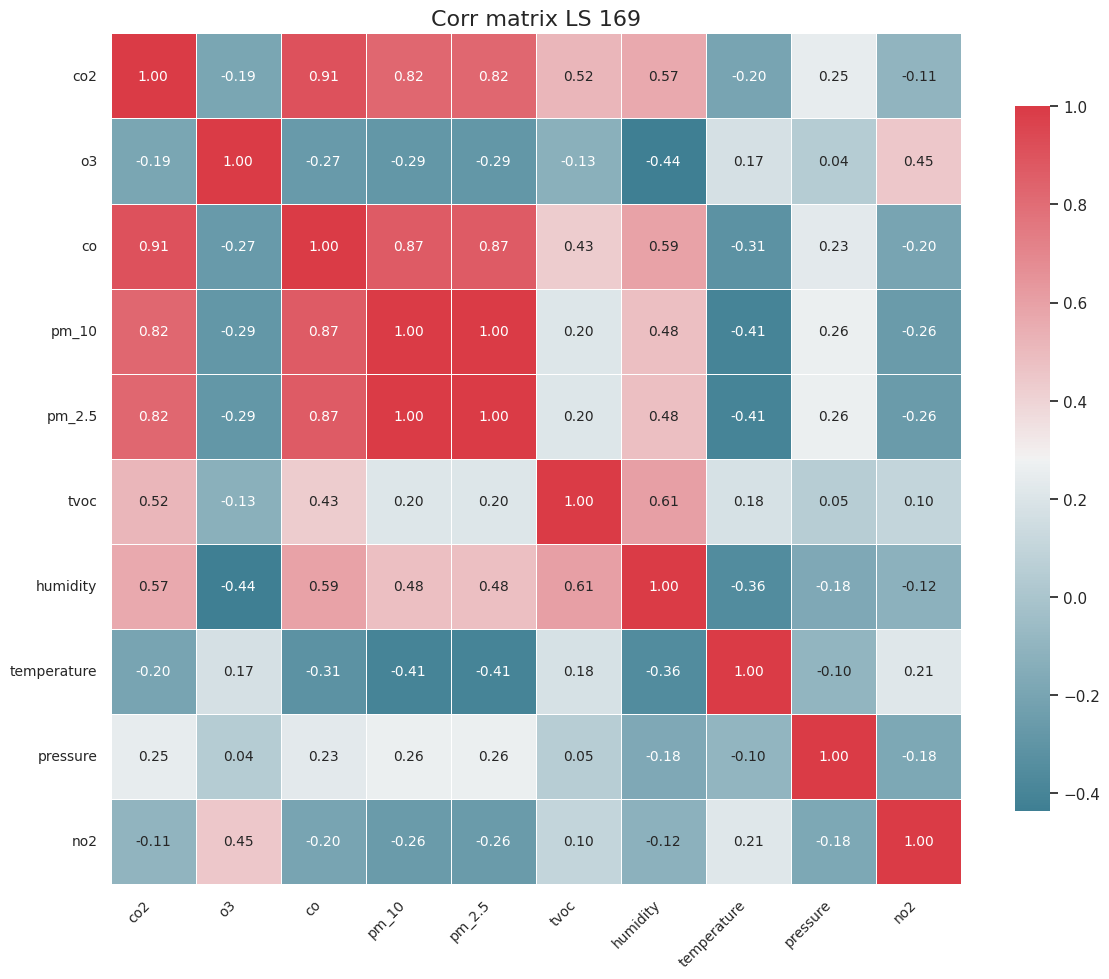

In [25]:
plot_correlation_matrix(df=df_169.corr(),title=f"Corr matrix LS 169")

## PAHs

### Time series plots

In [26]:
plot_experiment_range(df=df_169.resample('240s').mean(),col_names=['pm_10','pm_2.5'],max_value=110)


### Diff plot

In [27]:
plot_experiment_range(df=df_169.resample('240s').mean().diff(),col_names=['pm_10','pm_2.5'])

### diff percentage plot

In [28]:
plot_experiment_range(df=df_169.resample('240s').mean().pct_change() * 100,col_names=['pm_10','pm_2.5'],max_value=100)

## O3 and NO2

### Time Series

In [29]:
plot_experiment_range(df=df_169.resample('240s').mean(),col_names=['o3','no2'],min_value=-50)

### diff plot

In [30]:
plot_experiment_range(df=df_169.resample('240s').mean().pct_change() * 100,col_names=['o3','no2'],max_value=50,min_value=-75)

## CO2 CO

### Time series

In [31]:
plot_experiment_range(df=df_169.resample('240s').mean(),col_names=['co2','co'],max_value=3000)

### diff plot

In [32]:
plot_experiment_range(df=df_169.resample('240s').mean().pct_change() * 100,col_names=['co2','co'],max_value=1000,min_value=-1000)

## Temperature and Humidity

### time series plot

In [33]:
plot_experiment_range(df=df_169.resample('240s').mean(),col_names=['temperature','humidity'])



## TVOC 

In [34]:
plot_experiment_range(df=df_169.resample('240s').mean(),col_names=['tvoc'])

## Overall analysis

In [35]:
diff_df = transform_diff_avg(df_169.resample('240s').mean())
diff_df.dropna(axis=1,inplace=True)
diff_df

Doors opened  Hall opened  Indoor Room Air Exchange  Rowing CD  \
co2            -11.073625    -3.793868                -10.563112   5.132014   
o3               5.191575     3.274514                  5.659960   2.326397   
co              16.194362   -10.216929                -20.301120  -0.234183   
pm_10          -16.108887    -3.250834                -10.038319  -0.861383   
pm_2.5         -16.108878    -3.250777                -10.038319  -0.853917   
tvoc            -5.810194    -2.832865                 -6.806514   0.361780   
humidity        -2.892323    -1.011355                 -0.254848   1.415501   
temperature     -0.948091    -0.489960                 -1.612994  -0.160195   
pressure         0.001537     0.000919                  0.002512   0.004406   
no2              5.173404     2.413305                  6.236317   4.297055   

             Rowing OD  Human Presence  Diffuser (Water)  Diffuser (Oil)  \
co2         -21.249595       -0.950830          1.966771        1.242817   
o3            2.828014        1.478905         -0.368246       -0.074795   
co           58.463068       -7.415784         -8.994920      -14.148736   
pm_10       -31.239790       -1.009055         27.571655       45.935049   
pm_2.5      -31.239790       -1.009043         27.539248       44.379255   
tvoc        -13.335203       -0.575624          0.859031        4.582679   
humidity     -4.710631       -0.465976          0.584496        0.437758   
temperature  -0.972471        0.082151          0.167380       -0.046775   
pressure      0.000132       -0.003446         -0.000082       -0.003681   
no2           1.870275        2.088847         -0.047979       -0.289232   

               Car (3m)    Car (5m)  Gas Burner (CD)  Gas Burner (OD)  \
co2           -8.554319  -10.661254         7.402583       -10.732392   
o3             1.959764    4.623586        11.173763         2.951079   
co           147.072044  159.017175         3.631678        69.530995   
pm_10        -60.195215  -47.049237         0.106632        -9.681196   
pm_2.5       -59.906649  -46.863954         0.106512        -9.681552   
tvoc           4.529158  -15.804507        -0.256165        -9.272933   
humidity      -8.244641   -6.874096        -0.142083        -3.738323   
temperature   -0.481930   -0.073838         0.207858        -0.788777   
pressure      -0.000289    0.001031        -0.003646        -0.001795   
no2          -13.999278   -8.110580         9.510099         9.363358   

                Candle  
co2           1.287551  
o3           -1.346005  
co          -43.831751  
pm_10         1.098898  
pm_2.5        1.098898  
tvoc          2.424219  
humidity      0.701832  
temperature   0.373648  
pressure     -0.001998  
no2          -1.122203

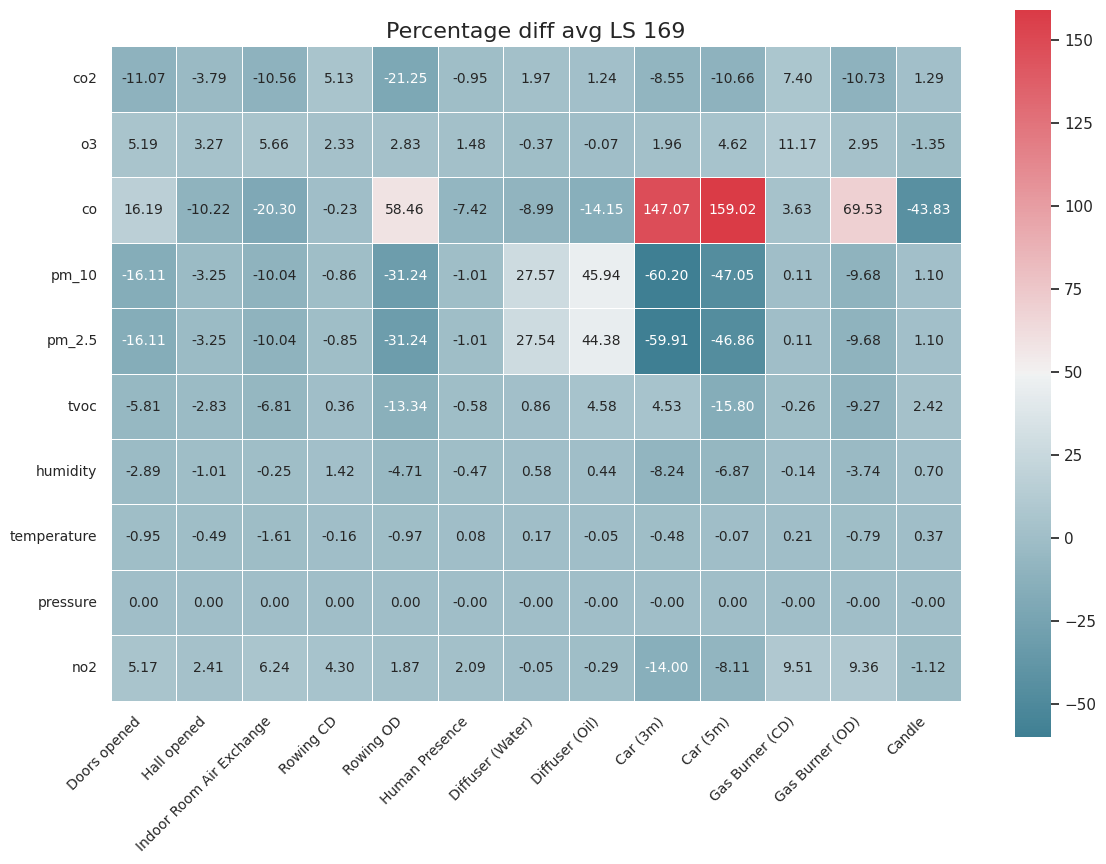

In [36]:
plot_correlation_matrix(diff_df,title="Percentage diff avg LS 169")